# Pascal VOC

📌 [**Información del Dataset (Ultralytics)**](https://docs.ultralytics.com/es/datasets/detect/voc/#sample-images-and-annotations)
📌 [**Información del Dataset (Oxford OG)**](http://host.robots.ox.ac.uk/pascal/VOC/)

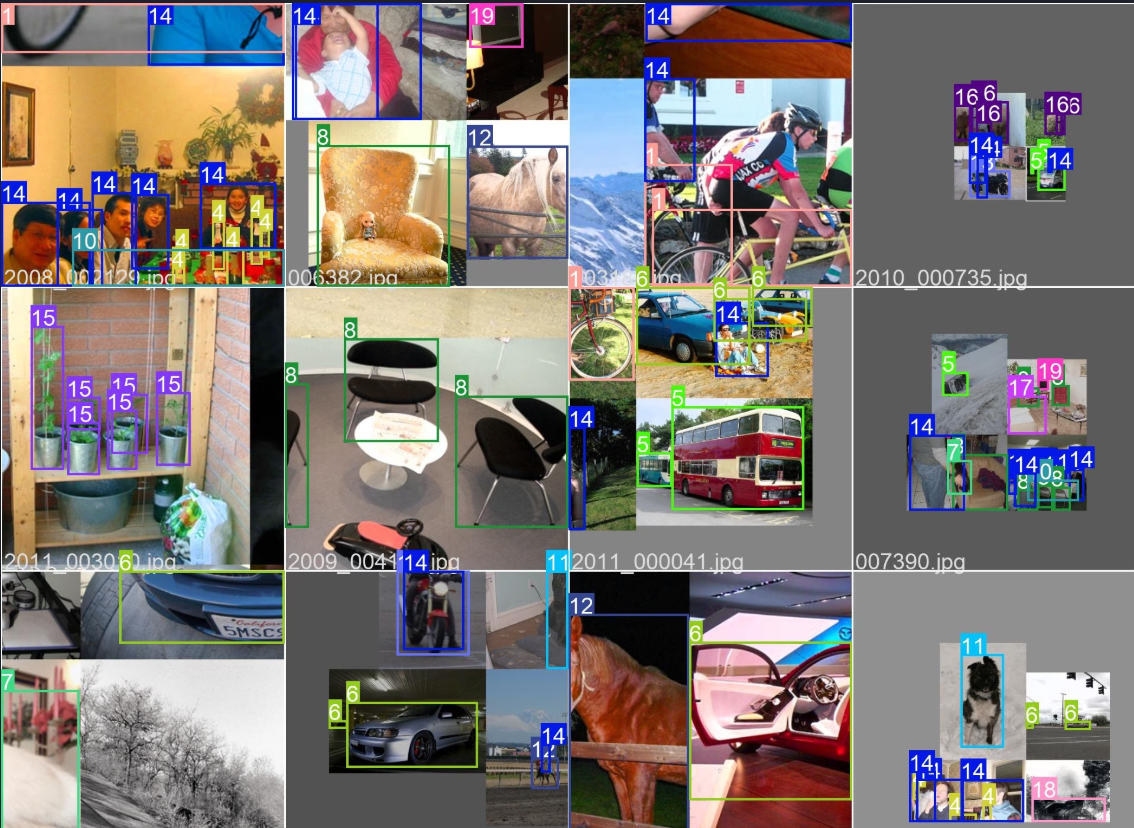


### 🔹 **¿Qué es Pascal VOC?**  
**Pascal VOC (Visual Object Classes)** es un dataset ampliamente utilizado en visión por computador para **detección de objetos**, **segmentación de imágenes** y **clasificación**. Fue desarrollado por la Universidad de Oxford y contiene imágenes con **20 clases de objetos** comunes, como personas, coches, animales y muebles.  

### 🔹 **Características principales:**  
✅ Contiene imágenes con objetos anotados mediante **bounding boxes** (cajas delimitadoras).  
✅ Incluye conjuntos de entrenamiento (`train`), validación (`val`) y prueba (`test`).  
✅ Es una de las bases de datos de referencia para evaluar modelos de detección de objetos como **YOLO, Faster R-CNN y SSD**.  

El dataset con el que estamos trabajando cuenta con:

| Tipo   | Conjunto | Cantidad de Imágenes |
|--------|---------|-----------------|
| Images | Test    | 4952            |
| Images | Train   | 5717            |
| Images | val     | 5823            |
| Labels | Test    | 4952            |
| Labels | Train   | 5717            |
| Labels | val     | 5823            |

Lo cual no tiene mucho sentido, ver y valorar qué hacer con esto

---


## **Pipeline de Entrenamiento**

El proceso seguido en este proyecto incluye los siguientes pasos:

1. **Carga del dataset:** Se procesan las imágenes y etiquetas en formato YOLO. (Venían los archivos ya en formato YOLO, por lo que es descargarlos y hacer los data.yaml)
2. **Evaluación del modelo preentrenado:** Se usa un modelo YOLO sin ajuste para obtener un punto de referencia inicial.
3. **Fine-tuning sin Data Augmentation (DA):** Entrenamos el modelo con los datos originales.
4. **Fine-tuning con DA Clásico:** Aplicamos transformaciones como rotaciones y cambios de brillo.
5. **Fine-tuning con Modelos de Difusión:** Generamos imágenes sintéticas para mejorar la variabilidad del dataset.
6. **Fine-tuning con DA Híbrido:** Combinamos ambas técnicas para evaluar su impacto.
7. **Comparación de Resultados:** Se analizan métricas como precisión y recall para cada método.


    ***Nota:** Todos los entrenamientos de modelos se ejecutan en archivos `.py` independientes para optimizar su implementación en servidores, ya que ejecutarlos directamente en un notebook no sería eficiente.* 
---

## **Métricas de Evaluación**

Para evaluar el rendimiento del modelo, se utilizan las siguientes métricas:

- **Precisión (P)**: Proporción de verdaderos positivos sobre todas las predicciones positivas.
- **Recall (R)**: Proporción de verdaderos positivos sobre todas las instancias reales en la clase.
- **mAP@50**: Promedio de precisión cuando IoU (Intersection over Union) es al menos 50%.
- **mAP@50-95**: Promedio de precisión considerando IoU desde 50% hasta 95%.

Estas métricas permiten comparar el impacto de las distintas técnicas de Data Augmentation en la detección de objetos.

---

In [ ]:
data_path = "/mnt/homeGPU/azapata/TFG/datasets/VOC"
images_path = "/mnt/homeGPU/azapata/TFG/datasets/VOC/images/train2012"
labels_path = "/mnt/homeGPU/azapata/TFG/datasets/VOC/labels/train2012"

In [2]:
!python -c "import torch; print(torch.cuda.is_available())"

!python -c "import torch; print(torch.cuda.device_count())"
!python -c "import torch; print(torch.cuda.get_device_name(0))"

!nvcc --version

True
1
NVIDIA TITAN Xp
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [3]:
from ultralytics import YOLO

# Cargar el modelo entrenado
model = YOLO("yolov8l.pt")  

# Evaluar en el conjunto de validación
metrics = model.val(
    data="/mnt/homeGPU/azapata/TFG/datasets/VOC/VOC.yaml", 
    split="val",
    device="cuda"
)

# Mostrar métricas clave
print(f"📊 Precisión (mAP@50): {metrics.box.map50:.4f}")
print(f"📊 Precisión (mAP@50-95): {metrics.box.map:.4f}")
print(f"📊 Precisión promedio por clase: {metrics.box.maps}")


Ultralytics 8.3.73 🚀 Python-3.8.20 torch-2.4.1+cu118 CUDA:0 (NVIDIA TITAN Xp, 12196MiB)
YOLOv8l summary (fused): 268 layers, 43,668,288 parameters, 0 gradients, 165.2 GFLOPs


val: Scanning /mnt/homeGPU/azapata/TFG/datasets/VOC/labels/test2007... 4952 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4952/4952 [00:09<00:00, 510.81it/s]


val: New cache created: /mnt/homeGPU/azapata/TFG/datasets/VOC/labels/test2007.cache


/home/azapata/.conda/envs/ENVTFG_AUX/lib/python3.8/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 310/310 [01:24<00:00,  3.65it/s]


                   all       4952      12032     0.0937     0.0892     0.0978      0.085
                person        204        285          0          0    2.5e-05    1.6e-05
               bicycle        239        337      0.957      0.849      0.958      0.783
                   car        282        459          0          0   0.000116   6.07e-05
            motorcycle        172        263          0          0   0.000456   0.000353
              airplane        212        469          0          0          0          0
                   bus        174        213      0.915      0.934      0.976      0.897
                 train        721       1201    0.00379   0.000833     0.0127     0.0119
                 truck        322        358          0          0   0.000357   9.97e-05
                  boat        417        756          0          0   0.000311   0.000186
         traffic light        127        244          0          0   0.000279   0.000251
          fire hydran

Como es lógico, sin hacer ningún finetuning los resultados son para algunas clases muy buenas (con las que YOLO entrenado en COCO contaba) pero para las que no, no es capaz.
Por ello como baseline vamos a hacer finetuning de YOLO en Pascal VOC

---

## **Fine-tuning sin Data Augmentation (DA):**

                 Class     Images  Instances      Box(P        R        mAP50     mAP50-95)
                   all       4952      12032      0.844      0.799      0.876      0.701
             aeroplane        204        285       0.92      0.842      0.941      0.736
               bicycle        239        337      0.932      0.852      0.936      0.753
                  bird        282        459      0.868      0.791      0.879      0.675
                  boat        172        263      0.778      0.705      0.789      0.555
                bottle        212        469      0.807      0.699      0.804      0.593
                   bus        174        213      0.903      0.887      0.944      0.848
                   car        721       1201      0.887      0.892       0.95      0.795
                   cat        322        358      0.912      0.866      0.931      0.812
                 chair        417        756      0.727      0.664      0.748      0.556
                   cow        127        244       0.83      0.862      0.923      0.742
           diningtable        190        206      0.676      0.782      0.805      0.677
                   dog        418        489      0.902      0.806      0.918      0.769
                 horse        274        348      0.907      0.894      0.956      0.793
             motorbike        222        325      0.925      0.831      0.934      0.724
                person       2007       4528      0.913      0.811      0.924      0.701
           pottedplant        224        480      0.727      0.473      0.638       0.39
                 sheep         97        242      0.827      0.835       0.89      0.711
                  sofa        223        239      0.695      0.816      0.821      0.715
                 train        259        282      0.903      0.876      0.916      0.772
             tvmonitor        229        308      0.833      0.792       0.87      0.703

- **Tiempo de entrenamiento:** 22 horas, 24 minutos y 28 segundos. 

---
## **Fine-tuning con Data Augmentation Clásico (DA):**



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)
                   all       4952      12032      0.846      0.809      0.886      0.713
             aeroplane        204        285       0.95       0.87      0.952      0.778
               bicycle        239        337      0.923      0.878      0.948      0.778
                  bird        282        459      0.875      0.811      0.894      0.694
                  boat        172        263      0.787      0.692      0.801      0.553
                bottle        212        469      0.835      0.693      0.821      0.607
                   bus        174        213       0.88      0.906      0.959      0.863
                   car        721       1201      0.893      0.904      0.953      0.802
                   cat        322        358      0.931       0.87      0.948      0.823
                 chair        417        756      0.748      0.668      0.752      0.557
                   cow        127        244      0.805      0.861       0.91       0.74
           diningtable        190        206      0.696      0.777      0.843        0.7
                   dog        418        489      0.864       0.86      0.939      0.802
                 horse        274        348      0.928      0.899      0.953      0.783
             motorbike        222        325      0.928      0.855      0.942      0.734
                person       2007       4528       0.92      0.803      0.928      0.712
           pottedplant        224        480      0.769      0.498      0.667      0.417
                 sheep         97        242       0.77      0.818      0.866      0.694
                  sofa        223        239      0.677      0.849      0.824      0.734
                 train        259        282      0.889      0.876      0.935      0.773
             tvmonitor        229        308      0.846      0.783      0.877      0.714

- **Tiempo de entrenamiento:** 24 horas, 24 minutos y 45 segundos. 

---
## **Fine-tuning con Data Augmentation DM:**


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):           
                   all       4952      12032      0.844      0.807       0.88      0.708
             aeroplane        204        285      0.928      0.863      0.951      0.763
               bicycle        239        337      0.938      0.891      0.947       0.76
                  bird        282        459      0.889      0.766      0.897      0.697
                  boat        172        263      0.769      0.719      0.789      0.557
                bottle        212        469      0.822      0.712      0.806      0.591
                   bus        174        213      0.869      0.875      0.935      0.838
                   car        721       1201       0.89      0.903      0.953      0.805
                   cat        322        358      0.922      0.877      0.943      0.822
                 chair        417        756      0.708      0.681      0.758      0.569
                   cow        127        244      0.853      0.857      0.915      0.734
           diningtable        190        206      0.699       0.79      0.809      0.684
                   dog        418        489      0.915      0.824      0.929      0.787
                 horse        274        348      0.897        0.9      0.961      0.803
             motorbike        222        325      0.905      0.877      0.956      0.745
                person       2007       4528      0.924      0.819      0.927      0.703
           pottedplant        224        480      0.774      0.458      0.631      0.385
                 sheep         97        242      0.811      0.806      0.866      0.698
                  sofa        223        239      0.649      0.858      0.842      0.749
                 train        259        282      0.888      0.869      0.931      0.779
             tvmonitor        229        308      0.831        0.8      0.849      0.697

- **Tiempo de entrenamiento:** 1 día, 10 horas, 59 minutos

## **Fine-tuning con Data Augmentation Híbrido:**


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 
                   all       4952      12032      0.866       0.81      0.893      0.723
             aeroplane        204        285      0.927      0.881      0.961       0.78
               bicycle        239        337      0.935      0.895      0.951      0.779
                  bird        282        459      0.903        0.8      0.912      0.705
                  boat        172        263      0.832      0.707      0.829      0.576
                bottle        212        469      0.869      0.694       0.82      0.606
                   bus        174        213      0.877      0.915      0.954      0.864
                   car        721       1201      0.905      0.885      0.953      0.804
                   cat        322        358      0.911      0.888      0.955      0.847
                 chair        417        756      0.783      0.656      0.774      0.583
                   cow        127        244      0.836      0.873      0.927      0.747
           diningtable        190        206      0.716       0.81      0.822        0.7
                   dog        418        489       0.91      0.863      0.939      0.807
                 horse        274        348       0.93      0.899      0.961      0.799
             motorbike        222        325      0.936      0.874      0.951      0.746
                person       2007       4528      0.937      0.783      0.927      0.714
           pottedplant        224        480      0.795      0.477      0.672      0.424
                 sheep         97        242      0.849      0.785      0.896      0.719
                  sofa        223        239       0.69      0.837      0.833      0.747
                 train        259        282      0.918      0.878      0.936       0.79
             tvmonitor        229        308      0.867      0.808       0.89      0.723

- **Tiempo de entrenamiento:** 1 día, 12 horas, 26 minutos y 21 segundos

---
Tiempo de creación del dataset:

| Job ID  | Descripción   | Duración bruta     | Duración en horas |
|---------|----------------|--------------------|--------------------|
| **65806** | val 2012          | 1-06:45:37         | **30h 45m**        |
| **65807** | val 2007          | 1-06:01:25         | **30h 1m**         |
| **65805** | train 2007        | 1-06:44:07         | **30h 44m**        |
| **65510** | train 2012        | 2-18:30:43         | **66h 30m**        |

---
# **Visualización de los resultados**

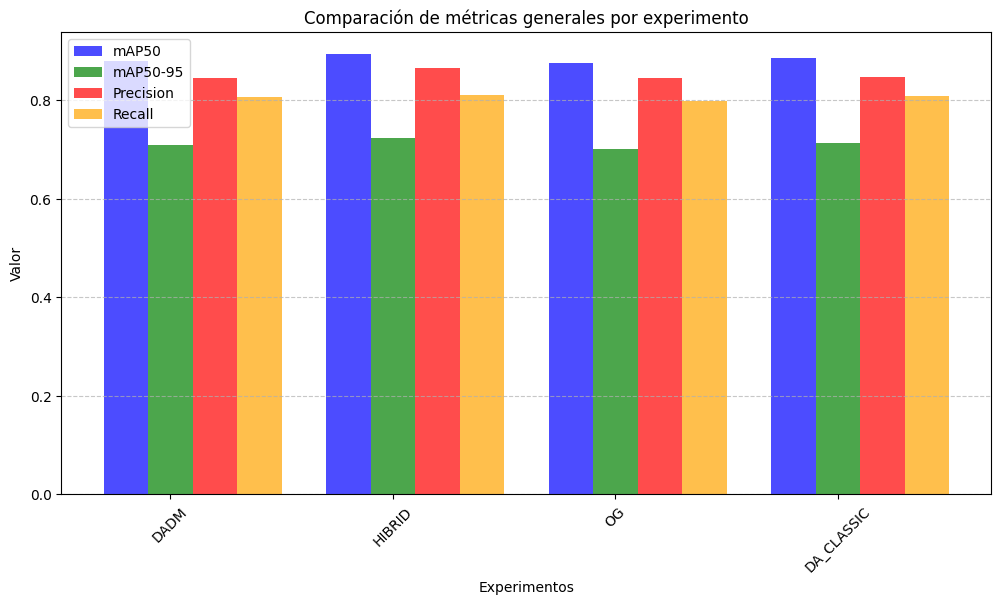

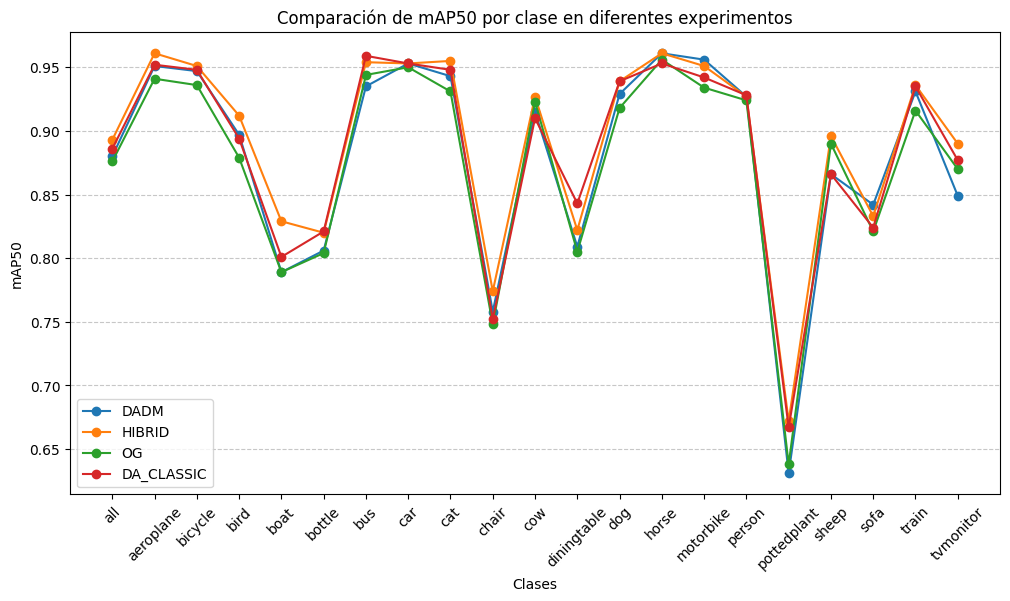

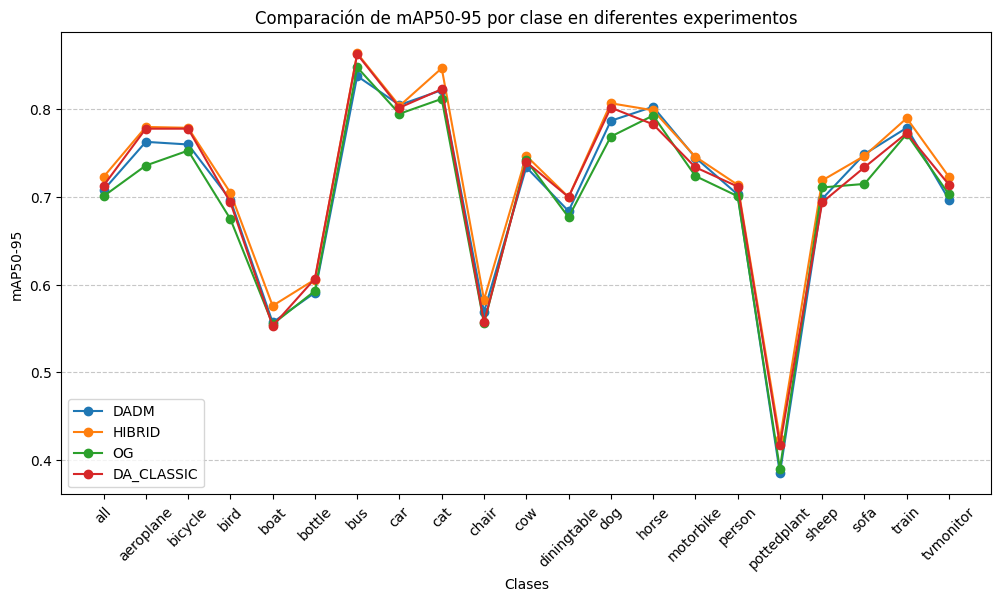

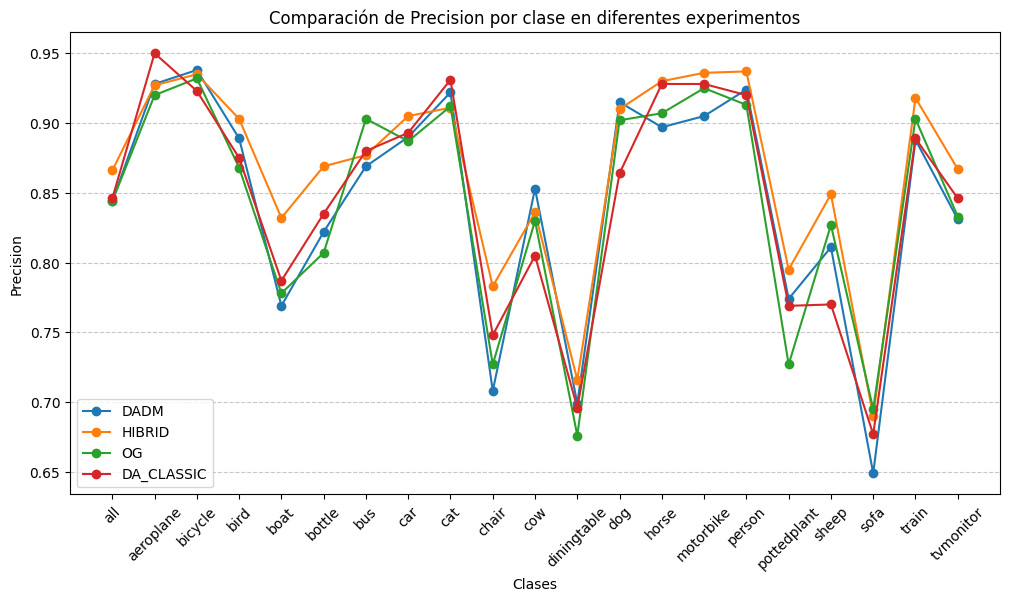

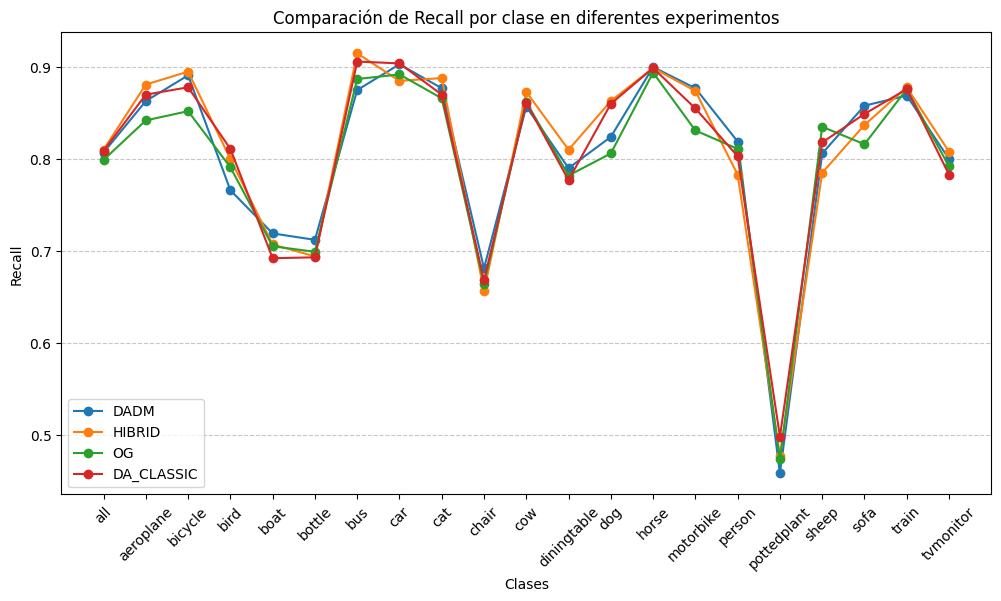

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ruta del archivo CSV
csv_path = "/mnt/homeGPU/azapata/TFG/MetricasDeEntrenamientos/PascalVOC/metricas_entrenamientos.csv"

# Cargar el CSV en un DataFrame
df = pd.read_csv(csv_path)

# Filtrar solo la clase 'all' para métricas generales
df_general = df[df["Class"] == "all"]

# Configuración de gráficos
metrics = ["mAP50", "mAP50-95", "Precision", "Recall"]
colors = ["blue", "green", "red", "orange"]

# --- 📊 Gráfico de Barras Agrupadas (Métricas Generales por Experimento) ---
x = np.arange(len(df_general["Experiment"]))  # Posiciones en el eje X
width = 0.2  # Ancho de las barras

plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.bar(x + i * width, df_general[metric], width=width, label=metric, color=colors[i], alpha=0.7)

# Configurar etiquetas y formato
plt.xlabel("Experimentos")
plt.ylabel("Valor")
plt.title("Comparación de métricas generales por experimento")
plt.xticks(x + width, df_general["Experiment"], rotation=45)  # Centrar etiquetas en las barras
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# --- 📈 Gráficos de Líneas (Métricas por Clase en Diferentes Experimentos) ---
for metric in metrics:
    plt.figure(figsize=(12, 6))
    for exp in df["Experiment"].unique():
        df_exp = df[df["Experiment"] == exp]
        plt.plot(df_exp["Class"], df_exp[metric], marker="o", linestyle="-", label=exp)

    plt.xlabel("Clases")
    plt.ylabel(metric)
    plt.title(f"Comparación de {metric} por clase en diferentes experimentos")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


---

## **🔍 Análisis métrico por técnica (segunda tanda)**

### **1️⃣ Fine-Tuning sin Data Augmentation (Baseline)**
✅ **mAP@50: 0.876** y **mAP@50-95: 0.701**, lo que indica un rendimiento **sólido** en detección general.  
✅ **Precisión (0.844)** y **Recall (0.799)** están **bien balanceados**, lo que muestra un buen equilibrio entre falsos positivos y negativos.  
⚠️ **Tiempo de entrenamiento: 22h 24m**, considerable, pero sin mejoras por DA.  
➡️ **Conclusión:** Buen punto de partida, aunque limitado al no usar data augmentation.

---

### **2️⃣ Data Augmentation Clásico**
✅ **mAP@50 sube a 0.886** y **mAP@50-95 a 0.713**, lo cual representa una mejora clara en detección, especialmente en **IoUs más estrictos**.  
✅ **Recall mejora a 0.809**, lo que indica que **detecta más objetos reales**.  
✅ **Precisión se mantiene (0.846)**, mostrando que no sacrifica demasiado la exactitud.  
⚠️ **Tiempo de entrenamiento: 24h 24m**, ligeramente superior al baseline.  
➡️ **Conclusión:** **Una mejora clara sobre el baseline**, sin pérdida notable de precisión.

---

### **3️⃣ Modelos de Difusión (DA con imágenes sintéticas)**
✅ **mAP@50 = 0.880** y **mAP@50-95 = 0.708**, buena mejora respecto al baseline, aunque no tan alta como DA Clásico o Híbrido.  
⚠️ **Precisión (0.844)** y **Recall (0.807)**, muy similares al DA Clásico, pero sin destacar.  
✅ Permite generalización con datos generados, pero no alcanza los valores más altos.  
➡️ **Conclusión:** DA con modelos de difusión **ofrece un rendimiento similar a DA Clásico**, pero sin destacar en ninguna métrica concreta.

---

### **4️⃣ DA Híbrido 👑 (Modelos de Difusión + DA Clásico)**
🏆 **mAP@50: 0.893 (el más alto)** y **mAP@50-95: 0.723 (también el mejor)**  
✅ **Precisión (0.866)**, claramente la más alta, lo que significa **menos falsos positivos**.  
✅ **Recall (0.810)** es también el más alto junto a DA Clásico y DM.  
⚠️ **Tiempo de entrenamiento: 25h aprox**, el más largo.  
➡️ **Conclusión:** **El mejor rendimiento global**, ideal si el tiempo de entrenamiento no es un problema.

---

## **📌 Conclusiones Generales (segunda tanda)**

| 🔍 **Métrica** | 📊 **Mejor técnica** |
|--------------|------------------|
| **Mayor mAP@50** | **DA Híbrido (0.893)** |
| **Mayor mAP@50-95** | **DA Híbrido (0.723)** |
| **Mayor Precisión** | **DA Híbrido (0.866)** |
| **Mayor Recall** | **DA Híbrido (0.810)** |
| **Menor tiempo de entrenamiento** | **Sin DA (22h 24m)** |

✔ **El Data Augmentation Híbrido vuelve a ser la técnica más eficaz**, incluso en esta segunda tanda de experimentos.  
⚠️ Si el **tiempo de entrenamiento es una prioridad**, **DA Clásico** es un buen compromiso: mejora el rendimiento respecto al baseline sin penalizar mucho el tiempo.
